# Project 2: Housing Price Prediction


# Problem Definition
Our goal in this project is to analyze housing data taken from 2006-2010 in Iowa and create a model to predict the sale price of the homes. The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price. The project should be done using Regression prediction techniques ( with feature scaling and regularization ). Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal. 

# Data Collection/Sources

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .

A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).



# Exploratory Data Analysis

# Processing

# Data Visualization/Communication of Results

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/Users/joeyrobak/Downloads/Housing.Data - Housing.Data.csv')

# Here I'm just importing our data, The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


In [3]:
print(df.shape)
df.head().transpose()

#path of least resistence, drop everything but the floats first

(2637, 81)


,0,1,2,3,4
PID,905101070,905101330,903454090,533244030,909252020
MS SubClass,20,90,50,60,70
MS Zoning,RL,RL,RM,FV,RL
Lot Frontage,62.0,72.0,50.0,68.0,60.0
Lot Area,14299,10791,9000,7379,7200
...,...,...,...,...,...
Mo Sold,7,10,12,4,4
Yr Sold,2007,2006,2007,2010,2009
Sale Type,WD,WD,WD,WD,WD
Sale Condition,Normal,Normal,Normal,Normal,Normal


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [5]:
float_df = df.select_dtypes(include='float64')
int_df = df.select_dtypes(include='int64')
num_df = float_df.join(int_df)
num_df



#Making a copy of our dataframe so we don't modify the original, only looking at numerical data currently.

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,...,0,0,0,0,0,0,0,7,2007,115400
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,...,0,0,0,0,0,0,500,10,2006,90000
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,...,0,162,0,0,126,0,0,12,2007,141000
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,...,280,184,0,0,0,0,0,4,2010,254000
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,...,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,...,112,0,0,0,0,0,400,9,2006,114500
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,...,114,36,0,0,0,0,0,7,2009,162000
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,...,133,78,0,0,0,0,0,9,2009,211500
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,...,0,0,0,0,0,0,0,8,2009,165000


In [6]:
#This is just a quick and dirty look at our numerical columns, it helps me personally get a bearing on our dataframe
corr = num_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Lot Frontage,1.000000,0.223228,0.212286,0.034431,0.121012,0.355094,0.109700,-0.045547,0.088540,0.301058,0.351721,-0.106530,-0.421410,0.589199,0.208400,-0.068218,0.129555,0.103348,0.460991,0.020420,-0.004383,0.379570,0.179684,0.041521,0.232933,0.003988,0.345269,0.240883,0.119160,0.164550,-0.010544,0.020147,0.069019,0.160367,0.013259,0.023390,-0.005627,0.357142
Mas Vnr Area,0.223228,1.000000,0.285887,-0.013610,0.087586,0.382242,0.140490,-0.000873,0.249970,0.354833,0.366407,-0.243582,0.000571,0.137314,0.422037,-0.132828,0.310158,0.194648,0.378093,0.125080,-0.056658,0.393753,0.258576,0.190104,0.078022,-0.054249,0.269584,0.273639,0.152719,0.134065,-0.106207,0.025331,0.056370,0.011071,-0.025572,0.001584,-0.016366,0.506402
BsmtFin SF 1,0.212286,0.285887,1.000000,-0.060983,-0.489889,0.524524,0.643453,0.069977,0.181010,0.244749,0.292398,-0.110868,-0.051380,0.188551,0.267938,-0.039678,0.270672,0.141937,0.436187,-0.163901,-0.070001,0.189102,0.064414,-0.012565,-0.118179,-0.083208,0.028415,0.291439,0.217693,0.100365,-0.101918,0.070826,0.081536,0.093960,0.016907,-0.001286,0.027120,0.427809
BsmtFin SF 2,0.034431,-0.013610,-0.060983,1.000000,-0.238815,0.095250,0.171051,0.094488,-0.067357,-0.010261,0.006097,-0.000439,-0.072879,0.055292,-0.039208,0.043001,-0.026485,-0.056571,0.089630,-0.100145,-0.005277,-0.017734,-0.083961,-0.032809,-0.041190,-0.036407,-0.053746,0.066133,0.103607,-0.004739,0.038292,-0.022012,0.075109,0.045609,-0.001558,-0.006285,0.007498,0.009329
Bsmt Unf SF,0.121012,0.087586,-0.489889,-0.238815,1.000000,0.406733,-0.410715,-0.107476,0.172337,0.173811,0.158472,-0.084001,-0.137028,0.026916,0.270992,-0.145399,0.130946,0.167613,0.285954,-0.006209,0.041675,0.219396,0.271097,-0.037081,0.173493,0.047951,0.238319,-0.004720,-0.060960,0.119040,0.001504,-0.019425,-0.051316,-0.036474,-0.029649,0.021913,-0.033127,0.174628
Total Bsmt SF,0.355094,0.382242,0.524524,0.095250,0.406733,1.000000,0.325365,0.002069,0.340302,0.428430,0.469286,-0.201462,-0.222137,0.246816,0.539730,-0.171863,0.405522,0.295965,0.782696,-0.218010,-0.033055,0.413480,0.308910,-0.063966,0.035938,-0.053002,0.250098,0.326708,0.207495,0.223966,-0.089740,0.045551,0.063376,0.079599,-0.013036,0.018377,-0.002243,0.628669
Bsmt Full Bath,0.109700,0.140490,0.643453,0.171051,-0.410715,0.325365,1.000000,-0.147495,0.144726,0.154359,0.177041,-0.044396,0.012702,0.112005,0.161645,-0.034883,0.205280,0.125702,0.258250,-0.164186,-0.047282,0.051809,-0.030447,-0.041253,-0.164499,-0.018892,-0.054431,0.169862,0.190250,0.075758,-0.074047,0.043742,0.044927,0.047004,-0.013106,-0.006736,0.049217,0.277328
Bsmt Half Bath,-0.045547,-0.000873,0.069977,0.094488,-0.107476,0.002069,-0.147495,1.000000,-0.050460,-0.027729,-0.021823,0.010623,0.002473,0.027092,-0.048501,0.084600,-0.024301,-0.049207,-0.002806,-0.066461,-0.024364,-0.062032,-0.056694,-0.058726,0.015664,-0.051021,-0.052628,0.034449,0.056424,-0.045923,-0.020791,0.039823,0.043518,0.057100,-0.003968,0.023876,-0.019712,-0.042482
Garage Yr Blt,0.088540,0.249970,0.181010,-0.067357,0.172337,0.340302,0.144726,-0.050460,1.000000,0.576707,0.551783,-0.259524,0.092351,-0.004760,0.569697,-0.327586,0.831714,0.651249,0.244596,0.093045,-0.036570,0.268822,0.488952,0.224449,-0.048710,-0.099452,0.159419,0.082731,0.208013,0.221893,-0.303064,0.023574,-0.076077,-0.004225,-0.025041,0.024705,-0.006543,0.529771
Garage Cars,0.301058,0.354833,0.244749,-0.010261,0.173811,0.428430,0.154359,-0.027729,0.576707,1.000000,0.892040,-0.247019,-0.047860,0.201440,0.593861,-0.167497,0.529792,0.426257,0.427381,0.183537,-0.066671,0.482636,

In [7]:
corr = num_df.corrwith(df["SalePrice"])
# Our correlation matrix of our integer data shows some clear important features to consider, Overall quality, Gr Liv Area, and Garage Cars are the most correlated with our target, "SalePrice". But we also have to factor in all the categorical columns, which we will do further down.
corr.abs().sort_values(ascending=False).round(3)

SalePrice          1.000
Overall Qual       0.805
Gr Liv Area        0.705
Garage Cars        0.647
Garage Area        0.634
Total Bsmt SF      0.629
1st Flr SF         0.618
Year Built         0.563
Full Bath          0.542
Year Remod/Add     0.540
Garage Yr Blt      0.530
Mas Vnr Area       0.506
TotRms AbvGrd      0.494
Fireplaces         0.469
BsmtFin SF 1       0.428
Lot Frontage       0.357
Wood Deck SF       0.322
Open Porch SF      0.310
Half Bath          0.287
Bsmt Full Bath     0.277
Lot Area           0.269
2nd Flr SF         0.268
PID                0.258
Bsmt Unf SF        0.175
Enclosed Porch     0.142
Bedroom AbvGr      0.132
Kitchen AbvGr      0.123
Overall Cond       0.095
Screen Porch       0.091
MS SubClass        0.079
Pool Area          0.072
Mo Sold            0.053
Bsmt Half Bath     0.042
Low Qual Fin SF    0.041
3Ssn Porch         0.041
Yr Sold            0.030
Misc Val           0.020
BsmtFin SF 2       0.009
dtype: float64

In [8]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      449
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [9]:
cat_df = df.select_dtypes(include=['object'])
cat_df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,...,Detchd,Unf,TA,TA,N,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,Shed,WD,Normal
2,RM,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,P,NaN,NaN,NaN,WD,Normal
3,FV,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,...,Detchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
2633,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2634,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2635,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [10]:
cat_df.info()
nulls = cat_df.isnull().sum()
filter = nulls > 0
(nulls[filter].sort_values( ascending = False ) / cat_df.shape[0] * 100).round(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2637 non-null   object
 1   Street          2637 non-null   object
 2   Alley           180 non-null    object
 3   Lot Shape       2637 non-null   object
 4   Land Contour    2637 non-null   object
 5   Utilities       2637 non-null   object
 6   Lot Config      2637 non-null   object
 7   Land Slope      2637 non-null   object
 8   Neighborhood    2637 non-null   object
 9   Condition 1     2637 non-null   object
 10  Condition 2     2637 non-null   object
 11  Bldg Type       2637 non-null   object
 12  House Style     2637 non-null   object
 13  Roof Style      2637 non-null   object
 14  Roof Matl       2637 non-null   object
 15  Exterior 1st    2637 non-null   object
 16  Exterior 2nd    2637 non-null   object
 17  Mas Vnr Type    1030 non-null   object
 18  Exter Qu

Pool QC           99.583
Misc Feature      96.359
Alley             93.174
Fence             79.977
Mas Vnr Type      60.940
Fireplace Qu      48.692
Garage Finish      5.575
Garage Qual        5.575
Garage Cond        5.575
Garage Type        5.499
Bsmt Exposure      2.882
BsmtFin Type 2     2.806
Bsmt Qual          2.768
Bsmt Cond          2.768
BsmtFin Type 1     2.768
dtype: float64

In [11]:
# Since we have so many features to look at, dropping the features that have a very high percentage of nulls is the best route to go.

cat_df.drop("Misc Feature", axis = 1, inplace=True)
cat_df.drop("Pool QC", axis = 1, inplace=True)
cat_df.drop("Fence", axis = 1, inplace=True)
cat_df.drop("Mas Vnr Type", axis = 1, inplace=True)
cat_df.drop("Alley", axis = 1, inplace=True)
cat_df.drop("Fireplace Qu", axis = 1, inplace=True)


In [12]:
cat_df.info()
# Since we have so many features to look at, dropping the features that were very incomplete is the best route to go. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2637 non-null   object
 1   Street          2637 non-null   object
 2   Lot Shape       2637 non-null   object
 3   Land Contour    2637 non-null   object
 4   Utilities       2637 non-null   object
 5   Lot Config      2637 non-null   object
 6   Land Slope      2637 non-null   object
 7   Neighborhood    2637 non-null   object
 8   Condition 1     2637 non-null   object
 9   Condition 2     2637 non-null   object
 10  Bldg Type       2637 non-null   object
 11  House Style     2637 non-null   object
 12  Roof Style      2637 non-null   object
 13  Roof Matl       2637 non-null   object
 14  Exterior 1st    2637 non-null   object
 15  Exterior 2nd    2637 non-null   object
 16  Exter Qual      2637 non-null   object
 17  Exter Cond      2637 non-null   object
 18  Foundati

In [13]:
for col in cat_df:
    print(df[col].value_counts()/df[col].notna().sum())
    
    # Here we are looking at the distribution in our categorical data sets. Since these are nominal data sets, we can label encode our columns. 

MS Zoning
RL         0.774744
RM         0.158893
FV         0.046644
C (all)    0.009480
RH         0.008722
I (all)    0.000758
A (agr)    0.000758
Name: count, dtype: float64
Street
Pave    0.995449
Grvl    0.004551
Name: count, dtype: float64
Lot Shape
Reg    0.630262
IR1    0.339401
IR2    0.024649
IR3    0.005688
Name: count, dtype: float64
Land Contour
Lvl    0.896852
HLS    0.042093
Bnk    0.040197
Low    0.020857
Name: count, dtype: float64
Utilities
AllPub    0.998862
NoSewr    0.000758
NoSeWa    0.000379
Name: count, dtype: float64
Lot Config
Inside     0.729617
Corner     0.174061
CulDSac    0.060675
FR2        0.030717
FR3        0.004930
Name: count, dtype: float64
Land Slope
Gtl    0.952218
Mod    0.042473
Sev    0.005309
Name: count, dtype: float64
Neighborhood
NAmes      0.150550
CollgCr    0.091013
OldTown    0.082670
Edwards    0.063709
Somerst    0.061054
NridgHt    0.056883
Gilbert    0.056504
Sawyer     0.052332
NWAmes     0.043989
SawyerW    0.041714
Mitchel    0

In [14]:
#Before we label encode our categorical dataframe, let's make a copy to give us flexibility and a "paper trail" if our analysis isn't working how we'd expect. 
enc_cat_df = cat_df.copy()


In [15]:
# I wanted to maintain the same value count distribution for each subcolumn, but for the purpose of this project with fairly clean data I settled on using the mode. In the future I'd like to learn how to label encode with this in mind.

# Create an instance of labelencoder
labelencoder = LabelEncoder()

# For loop to integer encode selected categorical columns
for col in enc_cat_df:
    enc_cat_df[col] = labelencoder.fit_transform(enc_cat_df[col])
enc_cat_df.isnull().sum()

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64

In [16]:
# Double-checking our encoding looks good.
enc_cat_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,5,1,3,3,0,4,0,22,1,2,...,4,3,7,5,2,4,4,0,9,4
1,5,1,3,3,0,4,0,22,2,2,...,4,3,7,4,2,4,4,2,9,4
2,6,1,3,0,0,4,0,11,2,2,...,4,2,7,5,2,4,4,1,9,4
3,2,1,0,3,0,4,0,24,2,2,...,4,2,7,1,1,4,4,2,9,4
4,5,1,3,3,0,4,0,21,1,2,...,4,2,7,5,1,4,4,2,9,4


In [17]:
# For filling null values in our numerical columns, we were able to easily use the mean of each feature. A future consideration though, would be the standard deviation of each feature is being impacted, and with a really incomplete dataset this could have a significant impact.
num_cols = num_df.columns

for col in num_cols:
    num_df[col].fillna(num_df[col].mean(), inplace=True)


num_df.isnull().sum()

/var/folders/nl/cvxy58ks2mg_jyg002l659xc0000gn/T/ipykernel_35543/1060935711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df[col].fillna(num_df[col].mean(), inplace=True)


Lot Frontage       0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [18]:
num_df['PID'].value_counts(ascending=False)  

PID
905101070    1
902400090    1
528188120    1
903458170    1
527252070    1
            ..
533250190    1
531363010    1
527451640    1
909250120    1
528292060    1
Name: count, Length: 2637, dtype: int64

In [19]:
# We are dropping the column 'PID' because it's an index, not a feature for training a model.
num_df.drop('PID', axis=1, inplace=True)

In [20]:
# We did the work cleaning our data and label encoding it. Now it's time to put it all together.

enc_df = pd.concat([num_df, enc_cat_df], axis = 1)
enc_df.shape


(2637, 74)

In [21]:
enc_df.isna().sum().sum()

np.int64(0)

In [22]:
enc_df

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,...,4,3,7,5,2,4,4,0,9,4
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,...,4,3,7,4,2,4,4,2,9,4
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,...,4,2,7,5,2,4,4,1,9,4
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,...,4,2,7,1,1,4,4,2,9,4
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,...,4,2,7,5,1,4,4,2,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,...,4,3,7,5,2,4,4,2,9,4
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,...,4,2,7,1,2,4,4,2,9,4
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,...,4,2,7,1,0,4,4,2,9,4
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,...,4,3,7,1,1,4,4,2,9,4


In [23]:
# In order to have a correlation matrix focused on our target, we will "pop" column 'SalePrice' out as a data series and insert it at index 0.  
targ_column = enc_df.pop('SalePrice')
enc_df.insert(0, 'SalePrice', targ_column)

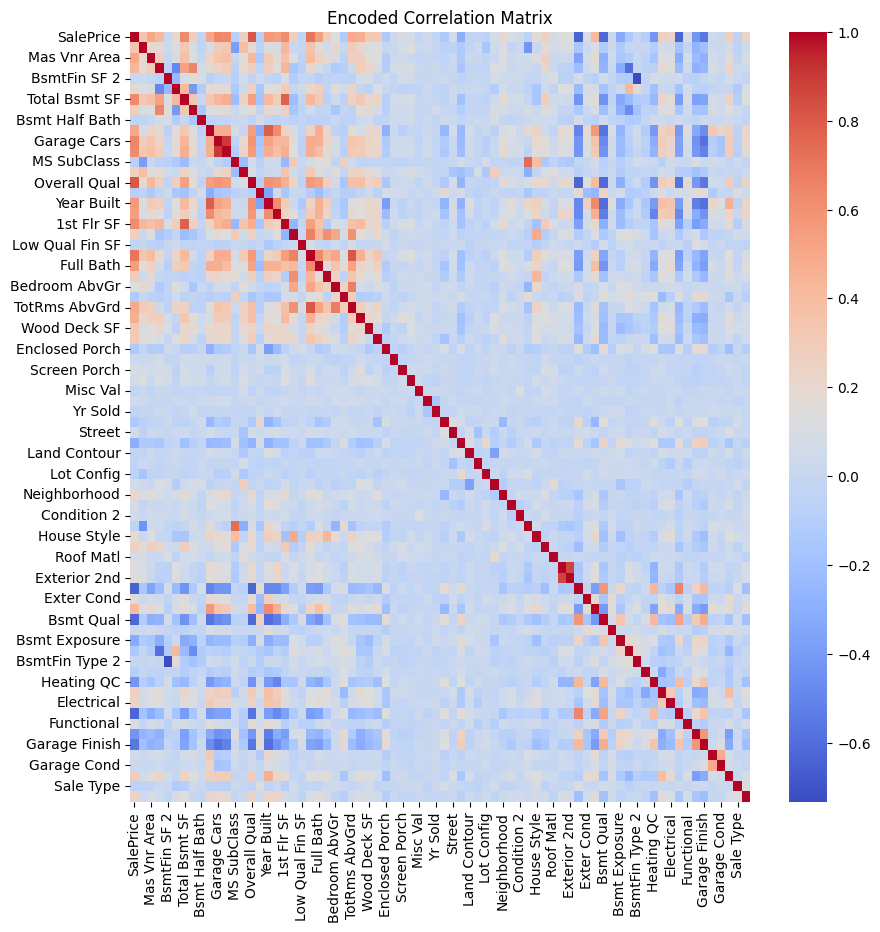

In [24]:
plt.figure(figsize=(10,10))
correlation_matrix = enc_df.corr()
sns.heatmap(data=correlation_matrix, annot=False, cmap='coolwarm') ;
plt.title("Encoded Correlation Matrix")
plt.show()

In [25]:
corr = enc_df.corrwith(enc_df["SalePrice"])

corr.abs().sort_values(ascending=False)



SalePrice         1.000000
Overall Qual      0.805016
Gr Liv Area       0.705482
Garage Cars       0.647207
Exter Qual        0.643525
                    ...   
Garage Cond       0.029642
Misc Val          0.019955
Bsmt Cond         0.019294
BsmtFin SF 2      0.009326
BsmtFin Type 2    0.004224
Length: 74, dtype: float64

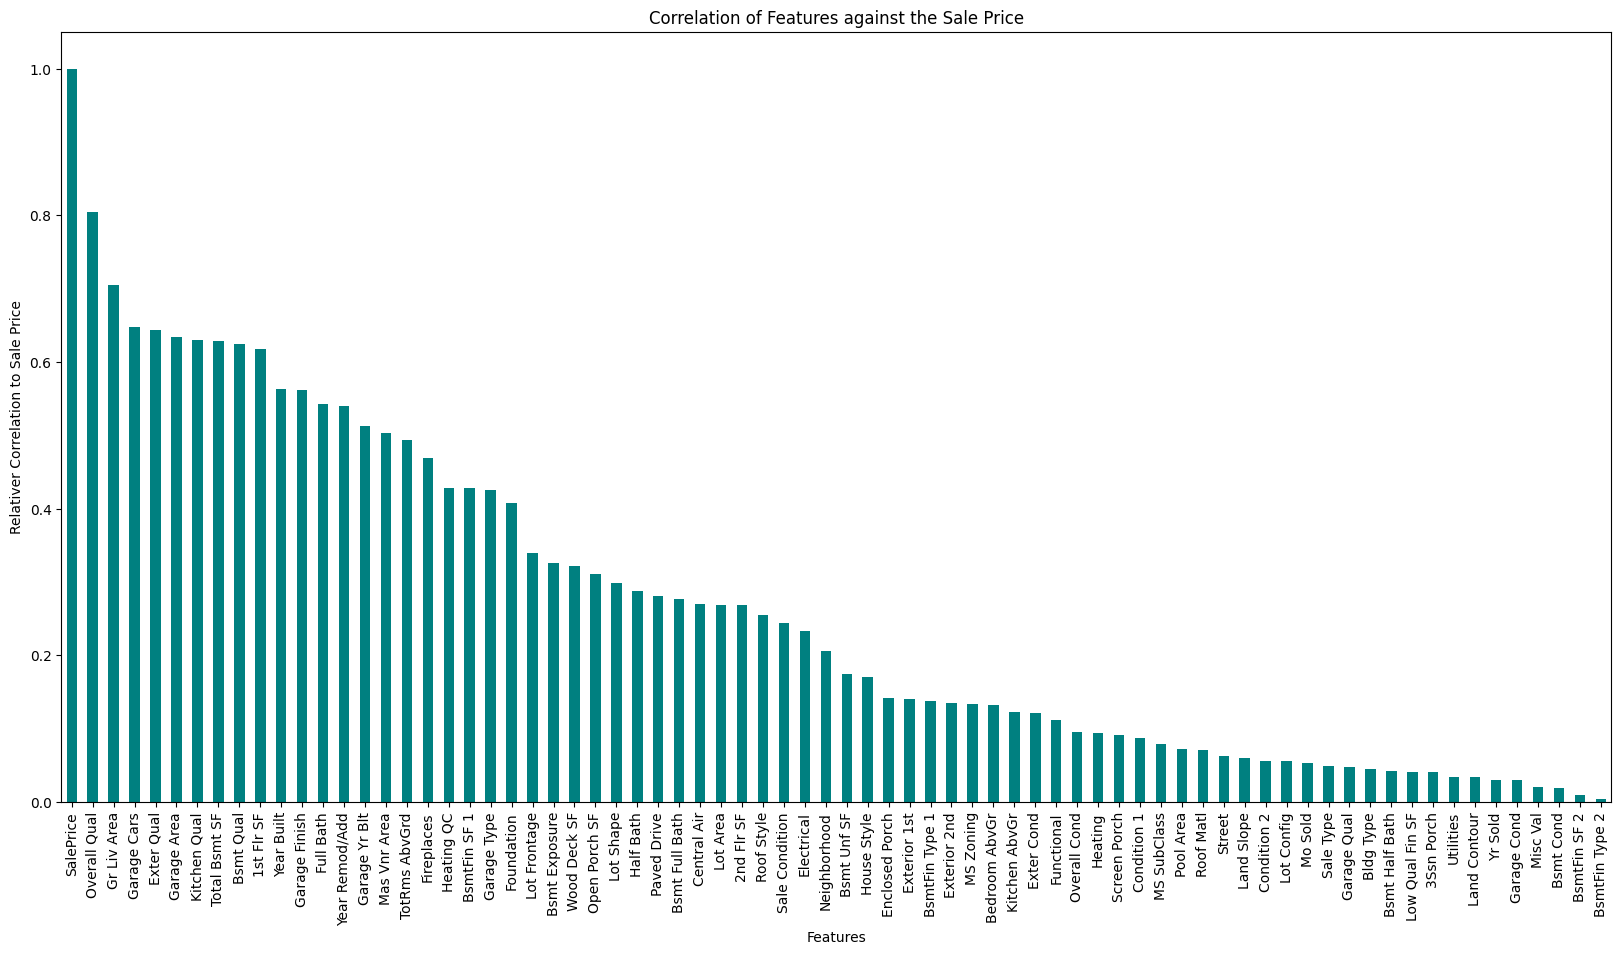

In [26]:
# Here's a visual of all of our features and their correlation with the Sale Price

enc_df.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (20,10), color="teal") 
plt.xlabel('Features')
plt.ylabel('Relativer Correlation to Sale Price')
plt.title('Correlation of Features against the Sale Price');
plt.savefig('Variable plot.png')

In [27]:
# As we can see we have quite the spread of features, while creating a model we only want to use data points that actually correlate to our target. Depending on the circumstances the threshold of correlation will be different.

filt_df = enc_df.copy()

In [28]:
# Here we create a mask based on how correlated things are with the target. We can udjust the thrishold and rerun the model to see how few features we need and still have a relatively accurate model.
threshold = 0.5
feature_mask = corr.abs() > threshold
filtered_cols = filt_df.columns[feature_mask]
filtered_cols

Index(['SalePrice', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Garage Finish'],
      dtype='object')

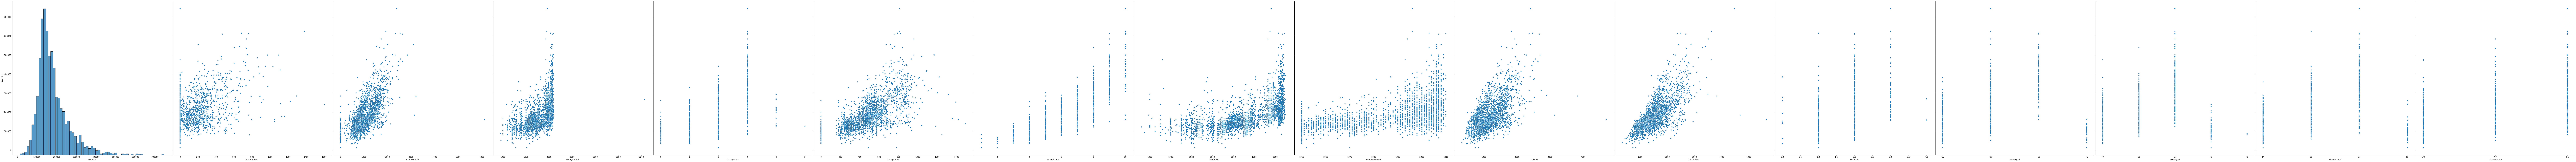

In [29]:
# Here is a pairplot of only our features that have at least a 0.5 correlation with the Sale Price.
# We used our dataframe that wasn't encoded because it gives more information about each individual feature
sns.pairplot(df, y_vars="SalePrice", x_vars=filtered_cols.values, height = 12, aspect = 1)

In [30]:
def rmspe(y_test, y_pred):
  '''
  This function takes y_test and y_pred and calculates the RMSPE, the Root Mean Square Percentage Error of our model'''
  return np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100

In [31]:
X = enc_df.drop('SalePrice', axis = 1)
y = enc_df['SalePrice']

In [32]:
filtX = enc_df[filtered_cols].drop('SalePrice', axis = 1)
filty = enc_df['SalePrice']

In [33]:
n = 1000
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = rmspe(y_test,y_pred)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {len(X.columns)}")

CV RMSPE: 19.75%
Number of Predictors: 73


Text(0.5, 1.0, 'Linear Regression with 73 Predictors')

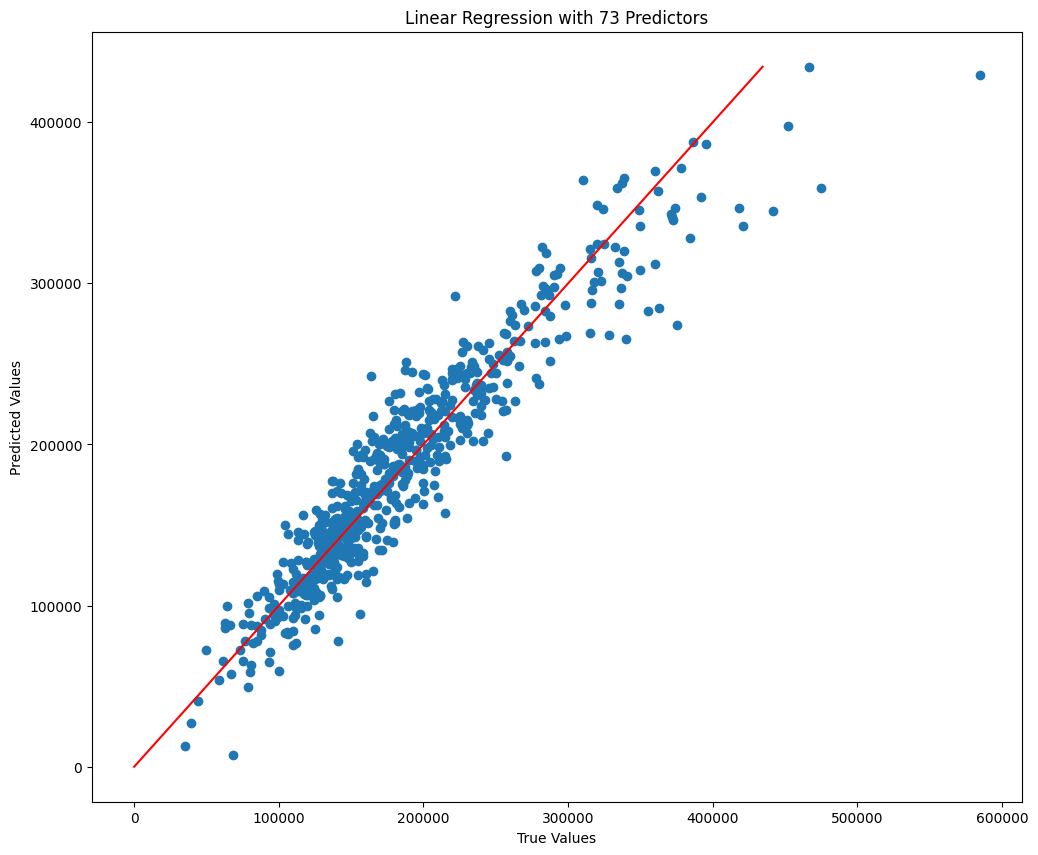

In [34]:
plt.figure(figsize = (12,10));
plt.scatter(y_test,y_pred);
plt.plot([0, max(y_pred)],[0, max(y_pred)], c ='Red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title("Linear Regression with 73 Predictors")

In [35]:
n = 1000
results = np.zeros(n)
for idx in range(n):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(filtX,filty,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train2, y_train2)
  y_pred2 = model.predict(X_test2)
  results[idx] = rmspe(y_test2,y_pred2)
print(f"CV RMSPE: {results.mean().round(2)}%")
print(f"Number of Predictors: {len(filtX.columns)}")

CV RMSPE: 22.92%
Number of Predictors: 15


Text(0.5, 1.0, 'Linear Regression with only top 15 Predictors')

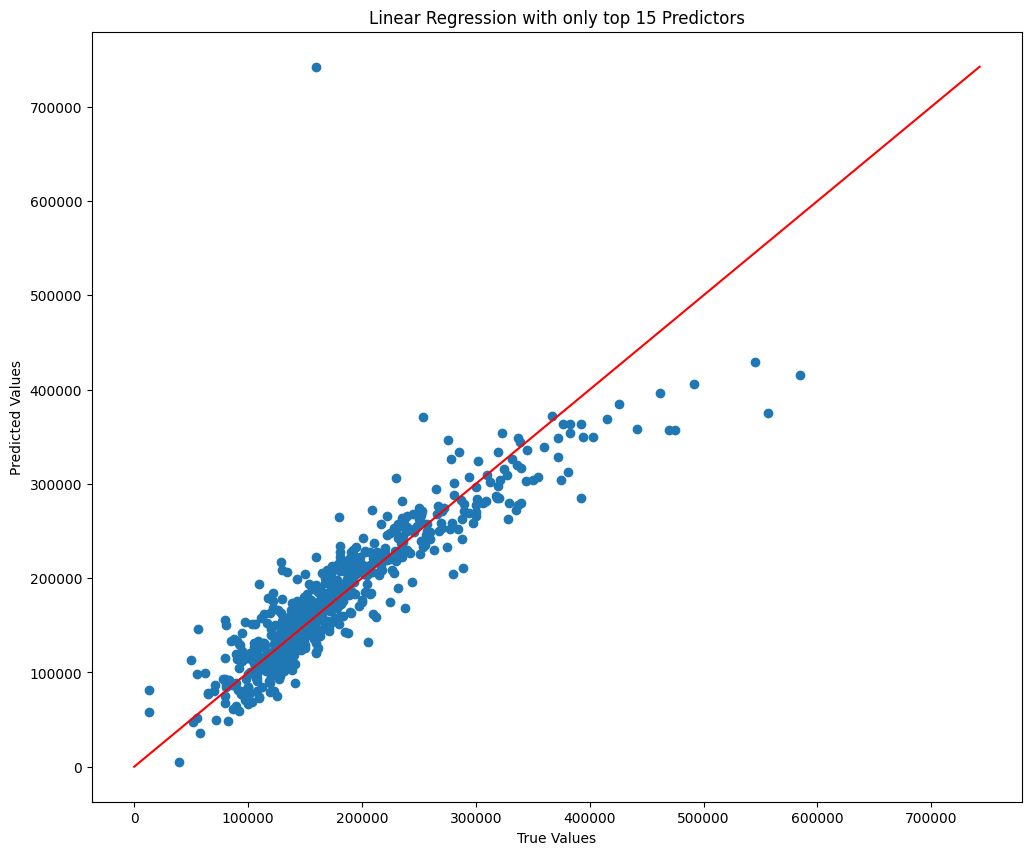

In [36]:
plt.figure(figsize = (12,10));
plt.scatter(y_test2,y_pred2);
plt.plot([0, max(y_pred2)],[0, max(y_pred2)], c ='Red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title("Linear Regression with only top 15 Predictors")


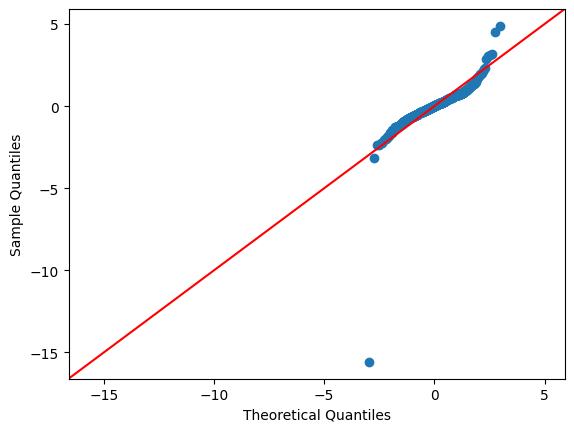

In [37]:
#QQ Plot
res = y_test2 - y_pred2
sm.qqplot(res, fit=True, line="45") ;

In [38]:
# Fit a linear model using statsmodels
myfit = sm.OLS(y_train2, X_train2).fit()
myfit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              5444.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        08:49:06   Log-Likelihood:                         -23196.
No. Observations:                1977   AIC:                                  4.642e+04
Df Residuals:                    1962   BIC:                                  4.651e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Mas Vnr Area      27.4959      4.421      6.219      0.000      18.825      36.167
Total Bsmt SF     23.7381      2.806      8.461      0.000      18.236      29.240
Garage Yr Blt   -185.2092     46.236     -4.006      0.000    -275.885     -94.533
Garage Cars     2553.5817   2198.905      1.161      0.246   -1758.853    6866.016
Garage Area       29.8312      7.551      3.951      0.000      15.023      44.640
Overall Qual    1.277e+04    859.805     14.849      0.000    1.11e+04    1.45e+04
Year Built       150.7471     43.512      3.465      0.001      65.413     236.081
Year Remod/Add    62.6068     37.770      1.658      0.098     -11.467     136.681
1st Flr SF        14.8277      3.153      4.702      0.000       8.644      21.012
Gr Liv Area       50.4631      2.192     23.018      0.000      46.164      54.763
Full Bath      -9492.4764   1751.415     -5.420      0.000   -1.29e+04   -6057.648
Exter Qual     -1.066e+04   1509.643     -7.058      0.000   -1.36e+04   -7694.977
Bsmt Qual      -6007.4080    736.207     -8.160      0.000   -7451.238   -4563.578
Kitchen Qual   -1.144e+04   1157.553     -9.880      0.000   -1.37e+04   -9166.122
Garage Finish  -4891.8816   1025.753     -4.769      0.000   -6903.562   -2880.201
==============================================================================
Omnibus:                      513.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32913.432
Skew:                          -0.222   Prob(JB):                         0.00
Kurtosis:                      22.984   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""